In [24]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
energy_efficiency = fetch_ucirepo(id=242)

X = energy_efficiency.data.features
y = energy_efficiency.data.targets

In [25]:
new_columns = {}
for row in energy_efficiency.variables.itertuples():
    new_columns[getattr(row, 'name')] = getattr(row, 'description')

X = X.rename(columns=new_columns)
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [110]:
import random
y = y.rename(columns=new_columns)
y['Cooling Load'] =  y['Cooling Load'] + random.uniform(-5, 5)
y['Heating Load'] = y['Heating Load'] + random.uniform(-5, 5)
X['Roof Area'] =  X['Roof Area'].apply(lambda x : x + + random.uniform(-5, 5))
X['Roof Area']

0      113.200523
1      115.132991
2      117.807842
3      112.584348
4      129.211003
          ...    
763    224.507621
764    230.582387
765    229.158637
766    224.197009
767    231.403836
Name: Roof Area, Length: 768, dtype: float64

In [111]:
df = X
df['Heating Load'] = y['Heating Load']
df['Cooling Load'] = y['Cooling Load']

In [115]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,113.200523,7.0,2,0.0,0,37.711087,32.207693
1,0.98,514.5,294.0,115.132991,7.0,3,0.0,0,37.711087,32.207693
2,0.98,514.5,294.0,117.807842,7.0,4,0.0,0,37.711087,32.207693
3,0.98,514.5,294.0,112.584348,7.0,5,0.0,0,37.711087,32.207693
4,0.90,563.5,318.5,129.211003,7.0,2,0.0,0,43.001087,39.157693


In [116]:
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-0.868684,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,0.880164,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-0.289417,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.686842e-01,8.801642e-01,-2.894168e-01,1.000000,-9.697642e-01,-2.530210e-03,-1.792988e-03,-5.061981e-04,-0.858878,-0.859790
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-0.969764,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-0.002530,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-0.001793,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-0.000506,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-0.858878,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-0.859790,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


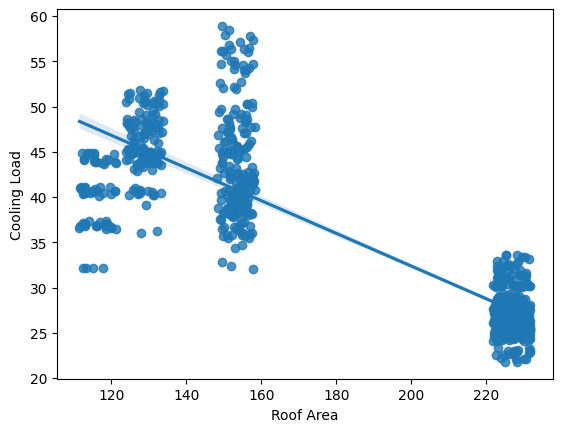

In [117]:
# Let's try and draw a regplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(df, y='Cooling Load', x='Roof Area')
plt.show()

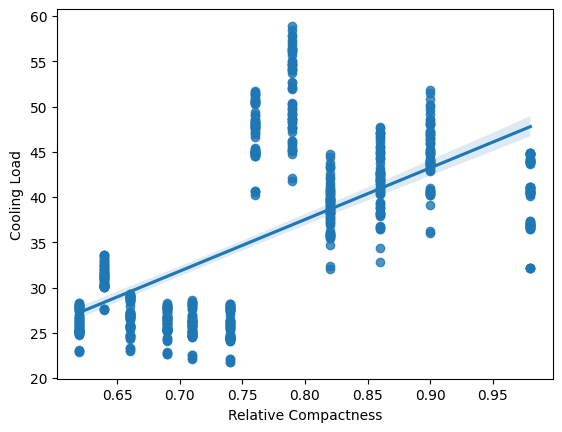

In [118]:
sns.regplot(df, y='Cooling Load', x='Relative Compactness')
plt.show()

## Let's train a stochastic linear regression model.

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df['Roof Area'], df['Cooling Load'], test_size=0.2)

reg_model = Sequential()
reg_model.add(
    Dense(units=1, input_dim=1, activation='linear')
)
reg_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.5))
history = reg_model.fit(
    X_train, y_train,  batch_size=10000, epochs=400)

Epoch 1/400
1/1 [==============================] - 0s 87ms/step - loss: 300.3128
Epoch 2/400
1/1 [==============================] - 0s 2ms/step - loss: 8732.9658
Epoch 3/400
1/1 [==============================] - 0s 2ms/step - loss: 803.8881
Epoch 4/400
1/1 [==============================] - 0s 2ms/step - loss: 2202.8843
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 5191.1758
Epoch 6/400
1/1 [==============================] - 0s 2ms/step - loss: 3838.3364
Epoch 7/400
1/1 [==============================] - 0s 2ms/step - loss: 1200.6459
Epoch 8/400
1/1 [==============================] - 0s 2ms/step - loss: 312.8988
Epoch 9/400
1/1 [==============================] - 0s 3ms/step - loss: 1474.6770
Epoch 10/400
1/1 [==============================] - 0s 2ms/step - loss: 2677.7000
Epoch 11/400
1/1 [==============================] - 0s 2ms/step - loss: 2451.4333
Epoch 12/400
1/1 [==============================] - 0s 2ms/step - loss: 1263.9103
Epoch 13/400
1/1 [=========

/Users/rufelleemmanuelpactol/DataspellProjects/EnergyEffeciency/venv/lib/python3.9/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 2ms/step - loss: 473.5685
Epoch 35/400
1/1 [==============================] - 0s 2ms/step - loss: 351.5450
Epoch 36/400
1/1 [==============================] - 0s 2ms/step - loss: 277.6530
Epoch 37/400
1/1 [==============================] - 0s 2ms/step - loss: 313.7741
Epoch 38/400
1/1 [==============================] - 0s 2ms/step - loss: 391.5108
Epoch 39/400
1/1 [==============================] - 0s 2ms/step - loss: 407.8997
Epoch 40/400
1/1 [==============================] - 0s 2ms/step - loss: 346.6462
Epoch 41/400
1/1 [==============================] - 0s 2ms/step - loss: 282.8254
Epoch 42/400
1/1 [==============================] - 0s 2ms/step - loss: 282.8691
Epoch 43/400
1/1 [==============================] - 0s 2ms/step - loss: 329.3058
Epoch 44/400
1/1 [==============================] - 0s 2ms/step - loss: 353.8770
Epoch 45/400
1/1 [==============================] - 0s 1ms/step - loss: 325.7773
Epoch 46/400
1/1 [=======================

In [125]:
reg_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 794us/step - loss: 61.7951


61.7950553894043

KeyError: 'val_loss'

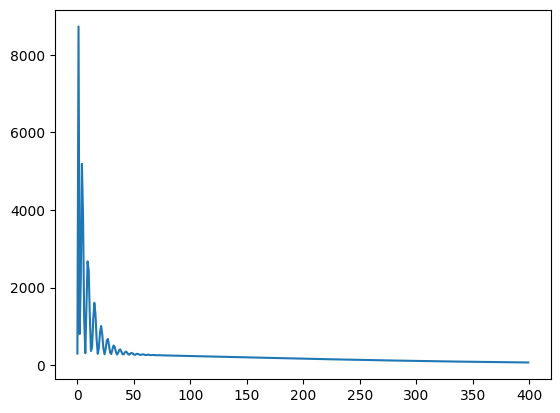

In [126]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 547us/step


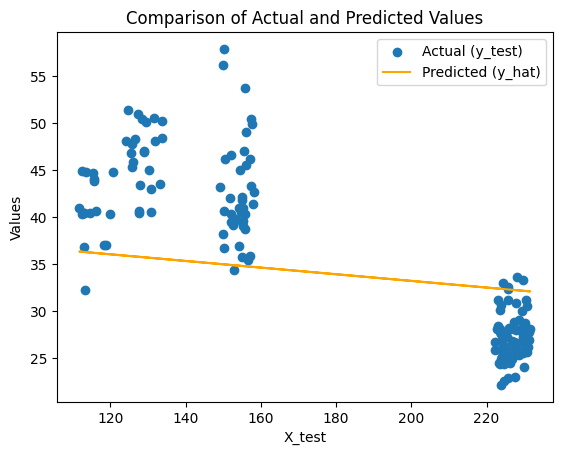

In [127]:
y_hat = reg_model.predict(X_test)
plt.scatter(X_test.squeeze(), y_test, label='Actual (y_test)')
plt.plot(X_test.squeeze(), y_hat, label='Predicted (y_hat)', color='orange')
plt.xlabel('X_test')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [128]:
X_test

462    227.406606
314    231.101644
472    230.760890
647    127.422118
211    150.543047
          ...    
590    153.263434
133    225.417856
698    231.412062
701    222.688338
87     223.283719
Name: Roof Area, Length: 154, dtype: float64